In [1]:
# imports general modules, runs ipython magic commands
# change path in this notebook to point to repo locally
# n.b. sometimes need to run this cell twice to init the plotting paramters
import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils/')
import alloptical_utils_pj as ao
import numpy as np
import utils_funcs as uf
import matplotlib.pyplot as plt
print(sys.path)
import funcs_pj as pjf

plt.rcParams['figure.figsize'] = [20.0, 3.0]

['/home/pshah/Documents/code/Vape/jupyter/Prajay', '/Applications/NEURON-7.6/nrn/lib/python', '/home/pshah/Documents/code/Vape/jupyter/Prajay', '/home/pshah/anaconda3/lib/python37.zip', '/home/pshah/anaconda3/lib/python3.7', '/home/pshah/anaconda3/lib/python3.7/lib-dynload', '', '/home/pshah/anaconda3/lib/python3.7/site-packages', '/home/pshah/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/pshah/.ipython', '/home/pshah/Documents/code/Vape/utils/', '/home/pshah/Documents/code/Vape/']


### run suite2p

In [7]:
#%%
import os
from suite2p.run_s2p import run_s2p
import numpy as np

# tiffs to run s2p on
to_suite2p = ['t-013', 't-015', 't-016']
save_folder = os.path.join('/home/pshah/mnt/qnap/Data/2020-03-19/', 'suite2p/spont-4ap-stitched')  # name of the folder to save results in (default = suite2p in data_path)


to_suite2p_tiffs = []
for i in to_suite2p:
    to_suite2p_tiffs.append('/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_Cycle00001_Ch3.tif' % (i,i))

data_path = []
for i in to_suite2p:
    data_path.append('/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/' % i)

tiff_list = to_suite2p_tiffs


In [8]:
#%%
# setup settings for suite2p
cell_diameter = 5.5
imaging_fps = 30.

ops = {
    'batch_size': 2000,  # reduce if running out of RAM
    'fast_disk': os.path.expanduser('~/Documents/suite2p_binaries'),
    # used to store temporary binary file, defaults to save_path0 (set as a string NOT a list)
    # 'save_path0': '/media/jamesrowland/DATA/plab/suite_2p', # stores results, defaults to first item in data_path
    'delete_bin': True,  # whether to delete binary file after processing
    # main settings
    'nplanes': 1,  # each tiff has these many planes in sequence
    'nchannels': 1,  # each tiff has these many channels per plane
    'functional_chan': 1,  # this channel is used to extract functional ROIs (1-based)
    'diameter': cell_diameter,
    # this is the main parameter for cell detection, 2-dimensional if Y and X are different (e.g. [6 12])
    'tau': 1.26,  # this is the main parameter for deconvolution (1.25-1.5 for gcamp6s)
    'fs': imaging_fps,  # sampling rate (total across planes)
    # output settings
    'save_mat': True,  # whether to save output as matlab files
    'combined': True,  # combine multiple planes into a single result /single canvas for GUI
    # parallel settings
    'num_workers': 50,  # 0 to select num_cores, -1 to disable parallelism, N to enforce value
    'num_workers_roi': 0,  # 0 to select number of planes, -1 to disable parallelism, N to enforce value
    # registration settings
    'do_registration': True,  # whether to register data
    'nimg_init': 200,  # subsampled frames for finding reference image
    'maxregshift': 0.1,  # max allowed registration shift, as a fraction of frame max(width and height)
    'align_by_chan': 1,  # when multi-channel, you can align by non-functional channel (1-based)
    'reg_tif': False,  # whether to save registered tiffs
    'subpixel': 10,  # precision of subpixel registration (1/subpixel steps)
    # 'two_step_registration': True,
    # 'keep_movie_raw': True,
    # cell detection settings
    'connected': True,  # whether or not to keep ROIs fully connected (set to 0 for dendrites)
    'navg_frames_svd': 5000,  # max number of binned frames for the SVD
    'nsvd_for_roi': 1000,  # max number of SVD components to keep for ROI detection
    'max_iterations': 20,  # maximum number of iterations to do cell detection
    'ratio_neuropil': 6.,  # ratio between neuropil basis size and cell radius
    'ratio_neuropil_to_cell': 3,  # minimum ratio between neuropil radius and cell radius
    'tile_factor': 1.,  # use finer (>1) or coarser (<1) tiles for neuropil estimation during cell detection
    'threshold_scaling': 1.,  # adjust the automatically determined threshold by this scalar multiplier
    'max_overlap': 0.75,  # cells with more overlap than this get removed during triage, before refinement
    'inner_neuropil_radius': 2,  # number of pixels to keep between ROI and neuropil donut
    'outer_neuropil_radius': np.inf,  # maximum neuropil radius
    'min_neuropil_pixels': 350,  # minimum number of pixels in the neuropil
    # deconvolution settings
    'baseline': 'maximin',  # baselining mode
    'win_baseline': 60.,  # window for maximin
    'sig_baseline': 10.,  # smoothing constant for gaussian filter
    'prctile_baseline': 8.,  # optional (whether to use a percentile baseline)
    'neucoeff': .7,  # neuropil coefficient
}

# make the local suite2p binaries file if it does not already exist
if not os.path.exists(ops['fast_disk']):
    os.mkdir(ops['fast_disk'])

diameter = cell_diameter  # the average diameter (in pixels) of a cell -- check in fiji
fs = int(imaging_fps)  # sampling rate of imaging (default 30 fps)
nplanes = 1  # number of planes (default 1)
nchannels = 1  # number of channels aquired (default 1)

db = {
    'data_path': data_path,
    'tiff_list': tiff_list,
    'diameter': diameter,
    'fs': fs,
    'nplanes': nplanes,
    'nchannels': nchannels,
    'save_folder': save_folder
}

In [9]:
import time as time
# run suite2p
t1 = time.time()
opsEnd=run_s2p(ops=ops, db=db)
t2 = time.time()
print('Total time this cell was running is {}'.format(t2-t1))

{'data_path': ['/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-013/', '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-015/', '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-016/'], 'tiff_list': ['/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-013/2020-03-19_t-013_Cycle00001_Ch3.tif', '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-015/2020-03-19_t-015_Cycle00001_Ch3.tif', '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-016/2020-03-19_t-016_Cycle00001_Ch3.tif'], 'diameter': 5.5, 'fs': 30, 'nplanes': 1, 'nchannels': 1, 'save_folder': '/home/pshah/mnt/qnap/Data/2020-03-19/suite2p/spont-4ap-stitched'}
FOUND OPS IN /home/pshah/mnt/qnap/Data/2020-03-19/suite2p/spont-4ap-stitched/plane0
NOTE: not registered / registration forced with ops['do_registration']>1
no offsets to delete
tif
** Found 3 tifs - converting to binary **
8000 frames of binary, time 246.07 sec.
time 772.75 sec. Wrote tifs to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
-------

/home/pshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After removing overlaps, 662 ROIs remain
Masks made in 15.83 sec.
Extracted fluorescence from 662 ROIs in 26975 frames, 89.34 sec.
----------- Total 190.10 sec.
----------- SPIKE DECONVOLUTION
----------- Total 42.07 sec.
Plane 0 processed in 897.17 sec (can open in GUI).
total = 264.40 sec.
TOTAL RUNTIME 265.93 sec
Total time this cell was running is 1671.45920920372


## Specifying bad frames with seizures

In [21]:
trial = 't-013'
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s' % trial

bad_frames = []
b = np.arange(720,1611)
a = np.arange(0,501)
bad_frames.extend(a)
bad_frames.extend(b)

np.save('%s/bad_frames.npy' % tiffs_loc, bad_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

print('/// Original # of frames:', exp_obj.n_frames, 'frames ///')
print('/// # of Photostim frames:', len(bad_frames), 'frames ///')
print('/// Minus photostim. frames total:', exp_obj.n_frames-len(bad_frames), 'frames ///')

/// Original # of frames: 5259 frames ///
/// # of Photostim frames: 1392 frames ///
/// Minus photostim. frames total: 3867 frames ///


In [20]:
bad_frames = []
b = np.arange(720,1611)
a = np.arange(0,501)
bad_frames.extend(a)
bad_frames.extend(b)
len(bad_frames)

1392

# VAPE for Photostim

### Exp: before 4AP - find_resp_001

In [1]:
trial = 't-002'

paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s' % trial
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_Cycle00001_Ch3.tif' % (trial, trial)
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_find_resp_001'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_J064_%s.paq' % trial

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

[['/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-002',
  '/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_find_resp_001',
  '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_J064_t-002.paq']]

In [2]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')

NameError: name 'ao' is not defined

In [4]:
photostim_frames = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        photostim_frames.append(j+i)

np.save('%s/bad_frames.npy' % tiffs_loc, photostim_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

print('/// Original # of frames:', exp_obj.n_frames, 'frames ///')
print('/// # of Photostim frames:', len(photostim_frames), 'frames ///')
print('/// Minus photostim. frames total:', exp_obj.n_frames-len(photostim_frames), 'frames ///')

AttributeError: 'alloptical' object has no attribute 'stim_start_frames'

In [4]:
# find photostim targeted cells
exp_obj._findTargets()

# numba of photostim frames with artifacts
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

print('# of total photostim artifact frames',len(frames_to_remove))

### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

tiff_path = tiffs_loc2
print(tiff_path)
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))


frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

im_stack_1 = im_stack
a = np.full_like(im_stack_1[0], fill_value=0)
a[0:100,0:100] = 5000.
for frame in frames_to_whiten:
    im_stack_1[frame-3] = im_stack_1[frame-3]+a
    im_stack_1[frame-2] = im_stack_1[frame-2]+a
    im_stack_1[frame-1] = im_stack_1[frame-1]+a    
print(im_stack_1.shape)

im_stack_1 = np.delete(im_stack_1, frames_to_remove, axis=0)
print('After delete shape artifactrem',im_stack_1.shape)

tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_artifactrem.tif" % (trial, trial),
           im_stack_1, photometric='minisblack')

del(im_stack_1)
    
# draw areas on top of im_stack_1 where targets are:
im_stack_2 = im_stack
b = np.full_like(im_stack_2[0], fill_value=0)
targets = np.floor_divide(exp_obj.target_areas, 2)
for i in np.arange(len(targets)):
    b[[*targets[i].T]]=1000
for frame in frames_to_whiten:
    im_stack_2[frame-6] = im_stack_2[frame-6]+b
    im_stack_2[frame-5] = im_stack_2[frame-5]+b
    im_stack_2[frame-4] = im_stack_2[frame-4]+b
    im_stack_2[frame-3] = im_stack_2[frame-3]+b
    im_stack_2[frame-2] = im_stack_2[frame-2]+b
    im_stack_2[frame-1] = im_stack_2[frame-1]+b  
print(im_stack_2.shape)
        

im_stack_2 = np.delete(im_stack_2, frames_to_remove, axis=0)


print('After delete shape targetcells',im_stack_2.shape)


tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_targetcells.tif" % (trial, trial),
           im_stack_2, photometric='minisblack')

print('done saving')

del(im_stack_2)
del(im_stack)

# # find the frames which are now photostim frames (relative to the new length after frames removed)
# new_tiff = "/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_artifactrem.tif" % (trial, trial)
# new_stack = tf.imread(new_tiff, key=(range(len(im_stack_1))))

# new_photostim_frames = []
# for i in range(len(new_stack)):
#     if new_stack[i][0][0]==1001:
#         new_photostim_frames.append(i)

Number of targets: 675
Got targets...


AttributeError: 'alloptical' object has no attribute 'stim_start_frames'

### Exp: t-017, t-018, t-019 (photostim after 4AP)

In [8]:
trial = 't-019'

paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s' % trial
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_Cycle00001_Ch3.tif' % (trial, trial)
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_J064_%s.paq' % trial

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

[['/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-019',
  '/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012',
  '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_J064_t-019.paq']]

n planes: 1 
n frames: 18381 
fps: 30.041206621887042 
frame size (px): 512 x 512 
zoom: 0.8 
pixel size (um): 2.73073099080674 2.73073099080674 
scan centre (V): 0.0 0.0
tiff_path
naparm_path
paq_path
fps
frame_x
frame_y
n_planes
pix_sz_x
pix_sz_y
scan_x
scan_y
zoom
n_frames
stim_type
['/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012/2020-03-19_photostim_012.gpl']
/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012/2020-03-19_photostim_012.gpl
Single stim dur (ms): 10
Spiral size (um): 0.07388
['/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012/2020-03-19_photostim_012.xml']
/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_photostim_012/2020-03-19_photostim_012.xml
Numbers of trials: 30 
Number of groups: 2 
Number of shots: 6 
Number of sequence reps: 1 
Inter-point delay: 40
n planes: 1 
n frames: 18381 
fps: 30.041206621887042 
frame size (px): 512 x 512 
zoom: 0.8 
pixel size (um): 2.73073099080674 2.730730

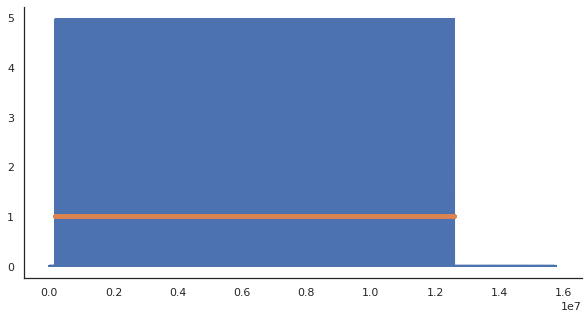

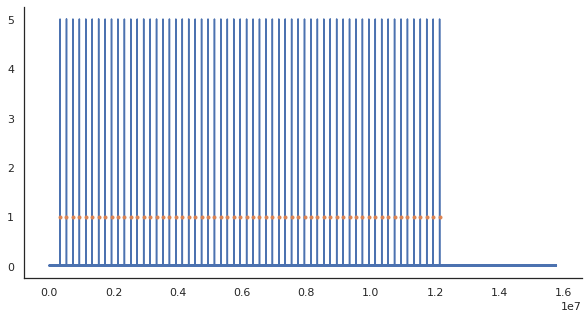

Number of targets: 62
Number of targets, SLM group #1: 31
Number of targets, SLM group #2: 31
Got all targets...


In [9]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')
exp_obj._findTargets()

In [4]:
photostim_frames = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        photostim_frames.append(j+i)

np.save('%s/bad_frames.npy' % tiffs_loc, photostim_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

#print(photostim_frames)
print('/// Original # of frames:', exp_obj.n_frames, 'frames ///')
print('/// # of Photostim frames:', len(photostim_frames), 'frames ///')
print('/// Minus photostim. frames total:', exp_obj.n_frames-len(photostim_frames), 'frames ///')


[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509

In [8]:
# find photostim targeted cells
exp_obj._findTargets()

# numba of photostim frames with artifacts
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

print('# of total photostim artifact frames:',len(frames_to_remove))

### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

tiff_path = tiffs_loc2
print(tiff_path)
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))


frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

im_stack_1 = im_stack
a = np.full_like(im_stack_1[0], fill_value=0)
a[0:100,0:100] = 5000.
for frame in frames_to_whiten:
    im_stack_1[frame-3] = im_stack_1[frame-3]+a
    im_stack_1[frame-2] = im_stack_1[frame-2]+a
    im_stack_1[frame-1] = im_stack_1[frame-1]+a    
print(im_stack_1.shape)

im_stack_1 = np.delete(im_stack_1, frames_to_remove, axis=0)
print('After delete shape artifactrem',im_stack_1.shape)

tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_artifactrem.tif" % (trial, trial),
           im_stack_1, photometric='minisblack')

del(im_stack_1)
    
# draw areas on top of im_stack_1 where targets are:
im_stack_2 = im_stack
b = np.full_like(im_stack_2[0], fill_value=0)
targets = np.floor_divide(exp_obj.target_areas, 2)
for i in np.arange(len(targets)):
    b[[*targets[i].T]]=1000
for frame in frames_to_whiten:
    im_stack_2[frame-6] = im_stack_2[frame-6]+b
    im_stack_2[frame-5] = im_stack_2[frame-5]+b
    im_stack_2[frame-4] = im_stack_2[frame-4]+b
    im_stack_2[frame-3] = im_stack_2[frame-3]+b
    im_stack_2[frame-2] = im_stack_2[frame-2]+b
    im_stack_2[frame-1] = im_stack_2[frame-1]+b  
print(im_stack_2.shape)
        

im_stack_2 = np.delete(im_stack_2, frames_to_remove, axis=0)


print('After delete shape targetcells',im_stack_2.shape)


tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_targetcells.tif" % (trial, trial),
           im_stack_2, photometric='minisblack')

print('done saving')

del(im_stack_2)
del(im_stack)

# # find the frames which are now photostim frames (relative to the new length after frames removed)
# new_tiff = "/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_artifactrem.tif" % (trial, trial)
# new_stack = tf.imread(new_tiff, key=(range(len(im_stack_1))))

# new_photostim_frames = []
# for i in range(len(new_stack)):
#     if new_stack[i][0][0]==1001:
#         new_photostim_frames.append(i)

Number of targets: 62
Got targets...
# of total photostim artifact frames: 660
/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-019/2020-03-19_t-019_Cycle00001_Ch3.tif
(18381, 512, 512)
After delete shape artifactrem (17721, 512, 512)


/home/pshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


(18381, 512, 512)
After delete shape targetcells (17721, 512, 512)
done saving


In [10]:
## save exp_obj as pickle
import pickle
# Pickle the expobject output to save it for analysis
pkl_path = '%s/2020-03-19_%s.pkl' % (tiffs_loc, trial)
with open(pkl_path, 'wb') as f:
        pickle.dump(exp_obj, f)
print("Pkl saved to %s" % pkl_path)

Pkl saved to /home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-019/2020-03-19_t-019.pkl


### Exp: t-008, t-009, t-010 (photostim baseline)

In [2]:
trial = 't-008'

paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s' % trial
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_Cycle00001_Ch3.tif' % (trial, trial)
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-18_photostim_002'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_J064_%s.paq' % trial

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

[['/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-008',
  '/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-18_photostim_002',
  '/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_J064_t-008.paq']]

n planes: 1 
n frames: 18381 
fps: 30.044873821745202 
frame size (px): 512 x 512 
zoom: 0.8 
pixel size (um): 2.73073099080674 2.73073099080674 
scan centre (V): 0.0 0.0
tiff_path
naparm_path
paq_path
fps
frame_x
frame_y
n_planes
pix_sz_x
pix_sz_y
scan_x
scan_y
zoom
n_frames
stim_type
['/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.gpl']
/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.gpl
Single stim dur (ms): 10
Spiral size (um): 0.07388
['/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.xml']
/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-18_photostim_002/2020-03-18_photostim_002.xml
Numbers of trials: 30 
Number of groups: 2 
Number of shots: 6 
Number of sequence reps: 1 
Inter-point delay: 40
n planes: 1 
n frames: 18381 
fps: 30.044873821745202 
frame size (px): 512 x 512 
zoom: 0.8 
pixel size (um): 2.73073099080674 2.730730

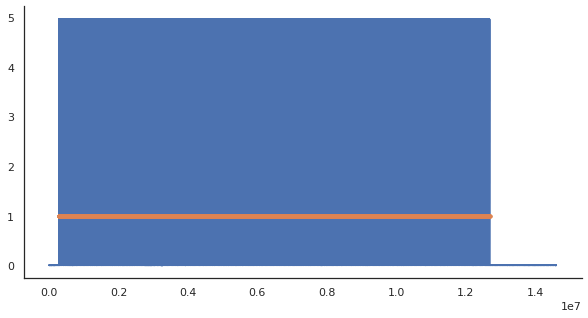

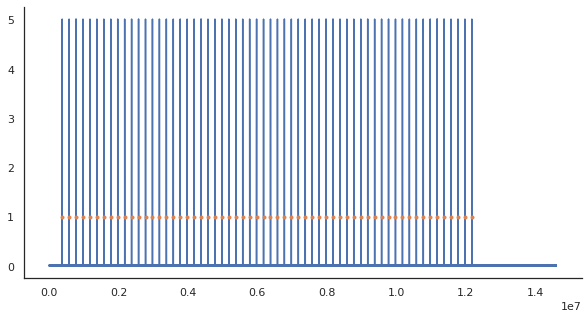

Number of targets: 62
Number of targets, SLM group #1: 31
Number of targets, SLM group #2: 31
Got targets...


In [3]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')
exp_obj._findTargets()

In [21]:
photostim_frames = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        photostim_frames.append(j+i)

np.save('%s/bad_frames.npy' % tiffs_loc, photostim_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

#print(photostim_frames)
print('/// Original # of frames:', exp_obj.n_frames, 'frames ///')
print('/// # of Photostim frames:', len(photostim_frames), 'frames ///')
print('/// Minus photostim. frames total:', exp_obj.n_frames-len(photostim_frames), 'frames ///')


[132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 

In [22]:
# numba of photostim frames with artifacts
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

print('# of total photostim artifact frames:',len(frames_to_remove))

### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

tiff_path = tiffs_loc2
print(tiff_path)
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))


frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

im_stack_1 = im_stack
a = np.full_like(im_stack_1[0], fill_value=0)
a[0:100,0:100] = 5000.
for frame in frames_to_whiten:
    im_stack_1[frame-3] = im_stack_1[frame-3]+a
    im_stack_1[frame-2] = im_stack_1[frame-2]+a
    im_stack_1[frame-1] = im_stack_1[frame-1]+a    
print('Shape', im_stack_1.shape)

im_stack_1 = np.delete(im_stack_1, frames_to_remove, axis=0)
print('After delete shape artifactrem',im_stack_1.shape)

tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_artifactrem.tif" % (trial, trial),
           im_stack_1, photometric='minisblack')

del(im_stack_1)
    
# draw areas on top of im_stack_1 where targets are:
im_stack_2 = im_stack
b = np.full_like(im_stack_2[0], fill_value=0)
targets = np.floor_divide(exp_obj.target_areas, 2)
for i in np.arange(len(targets)):
    b[[*targets[i].T]]=1000
for frame in frames_to_whiten:
    im_stack_2[frame-6] = im_stack_2[frame-6]+b
    im_stack_2[frame-5] = im_stack_2[frame-5]+b
    im_stack_2[frame-4] = im_stack_2[frame-4]+b
    im_stack_2[frame-3] = im_stack_2[frame-3]+b
    im_stack_2[frame-2] = im_stack_2[frame-2]+b
    im_stack_2[frame-1] = im_stack_2[frame-1]+b  
print('Shape', im_stack_2.shape)
        

im_stack_2 = np.delete(im_stack_2, frames_to_remove, axis=0)


print('After delete shape targetcells',im_stack_2.shape)


tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_targetcells.tif" % (trial, trial),
           im_stack_2, photometric='minisblack')

print('done saving')

del(im_stack_2)
del(im_stack)

# # find the frames which are now photostim frames (relative to the new length after frames removed)
# new_tiff = "/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_artifactrem.tif" % (trial, trial)
# new_stack = tf.imread(new_tiff, key=(range(len(im_stack_1))))

# new_photostim_frames = []
# for i in range(len(new_stack)):
#     if new_stack[i][0][0]==1001:
#         new_photostim_frames.append(i)

Number of targets: 62
Got targets...
# of total photostim artifact frames: 660
/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-010/2020-03-19_t-010_Cycle00001_Ch3.tif
(18381, 512, 512)
After delete shape artifactrem (17721, 512, 512)


/home/pshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


(18381, 512, 512)
After delete shape targetcells (17721, 512, 512)
done saving


In [4]:
## save exp_obj as pickle
import pickle
# Pickle the expobject output to save it for analysis
pkl_path = '%s/2020-03-19_%s.pkl' % (tiffs_loc, trial)
with open(pkl_path, 'wb') as f:
        pickle.dump(exp_obj, f)

In [5]:
exp_obj.target_coords

[(405, 74),
 (337, 80),
 (396, 83),
 (435, 83),
 (302, 89),
 (387, 93),
 (406, 120),
 (266, 124),
 (202, 134),
 (294, 137),
 (317, 137),
 (380, 150),
 (198, 153),
 (308, 155),
 (332, 156),
 (424, 156),
 (290, 161),
 (391, 167),
 (176, 168),
 (367, 168),
 (193, 169),
 (284, 170),
 (327, 184),
 (346, 188),
 (271, 193),
 (373, 194),
 (308, 199),
 (192, 206),
 (162, 216),
 (352, 220),
 (238, 222),
 (237, 236),
 (308, 236),
 (315, 236),
 (269, 237),
 (364, 237),
 (277, 250),
 (335, 250),
 (208, 252),
 (388, 256),
 (286, 258),
 (346, 260),
 (326, 268),
 (200, 269),
 (228, 271),
 (293, 272),
 (259, 280),
 (226, 296),
 (350, 299),
 (250, 301),
 (243, 310),
 (306, 314),
 (229, 334),
 (302, 335),
 (364, 337),
 (308, 340),
 (243, 343),
 (284, 347),
 (162, 357),
 (371, 363),
 (268, 373),
 (338, 373)]

# Troubleshooting zone

In [11]:
print(exp_obj.stim_dur, exp_obj.duration_frames)
print(len(exp_obj.stim_start_frames[0]))
#len(frames_to_remove)

300.0 10
60


In [12]:
# draw areas on top of im_stack_1 where targets are:
im_stack_2 = im_stack
b = np.full_like(im_stack_1[0], fill_value=0)
targets = np.floor_divide(exp_obj.target_areas, 2)
for i in targets:
    for j in i:
        b[j] = 1000.

TypeError: unsupported operand type(s) for //: 'list' and 'int'

In [55]:
targets = np.floor_divide(exp_obj.target_areas, 2)
for i in targets:
    b[[*targets[i].T]]=1000

IndexError: index 278 is out of bounds for axis 0 with size 62

In [67]:
for i in np.arange(len(targets)):
    print(i)
    b[[*targets[i].T]]=1000

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


/home/pshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
for i, j in enumerate(targets[0]):
    print(j[0])
    print(j[1])

278
144
278
144
278
145
278
143
278
143
278
144
278
144
278
145
278
145
278
146
279
142
279
143
279
143
279
144
279
144
279
145
279
145
279
146
279
146
279
142
279
143
279
143
279
144
279
144
279
145
279
145
279
146
279
146
280
142
280
142
280
143
280
143
280
144
280
144
280
145
280
145
280
146
280
146
280
147
280
142
280
142
280
143
280
143
280
144
280
144
280
145
280
145
280
146
280
146
280
147
281
142
281
142
281
143
281
143
281
144
281
144
281
145
281
145
281
146
281
146
281
147
281
142
281
143
281
143
281
144
281
144
281
145
281
145
281
146
281
146
282
142
282
143
282
143
282
144
282
144
282
145
282
145
282
146
282
146
282
143
282
143
282
144
282
144
282
145
282
145
282
146
283
144
283
144
283
145


In [49]:
b[[*targets[0].T]]=1000

/home/pshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [53]:
b[278][135:155]

array([   0,    0,    0,    0,    0,    0,    0,    0, 1000, 1000, 1000,
       1000,    0,    0,    0,    0,    0,    0,    0,    0], dtype=uint16)